In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns


In [4]:
#pip install --upgrade numpy scikit-learn

In [5]:
#pip uninstall scikit-learn

In [6]:
#pip install scikit-learn

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
cierra_data =pd.read_csv('C:/Users/user/Documents/course materials/phase_5/PERFUME-RECOMMENDER-SYSTEM/Data/cierra_updated.csv')

cierra_data.head()
cierra_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     2479 non-null   object
 1   title        2479 non-null   object
 2   price        2478 non-null   object
 3   link         2479 non-null   object
 4   image        2477 non-null   object
 5   description  2340 non-null   object
 6   top          1920 non-null   object
 7   middle       1530 non-null   object
 8   base         1233 non-null   object
dtypes: object(9)
memory usage: 174.4+ KB


### Price

In [9]:
# Step 1.1: Clean the 'price' column by removing non-numeric characters and converting to numeric

cierra_data['price'] = cierra_data['price'].astype(str).str.replace(r'[^\d.]', '', regex=True)
cierra_data['price'] = cierra_data['price'].replace('', np.nan).astype(float)


In [10]:
# Impute the missing value in 'price' with the median
median_price = cierra_data['price'].median()
cierra_data['price'].fillna(median_price, inplace=True)

# Verify that there are no missing values in the 'price' column
cierra_data_price_missing = cierra_data['price'].isnull().sum()
print(f"Missing values in 'price' after imputation: {cierra_data_price_missing}")

# Summary statistics to confirm successful cleaning
print(cierra_data['price'].describe())

Missing values in 'price' after imputation: 0
count     2479.000000
mean     21627.470754
std      14475.403134
min       3500.000000
25%      11300.000000
50%      17500.000000
75%      28000.000000
max      97500.000000
Name: price, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_19128\882753048.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cierra_data['price'].fillna(median_price, inplace=True)


In [11]:
# Step 1.3: Fill missing scent notes with placeholders (e.g., empty strings)
cierra_data['top'].fillna('', inplace=True)
cierra_data['middle'].fillna('', inplace=True)
cierra_data['base'].fillna('', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_19128\3838487880.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cierra_data['top'].fillna('', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_19128\3838487880.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

## Checking for missing values

In [12]:
# Confirm the cleaning by checking for any remaining missing values
missing_values = cierra_data.isnull().sum()
print("Missing values after cleaning:\n", missing_values)

# Optional: Show summary statistics of the 'price' column to confirm the transformation
print("Price column summary:\n", cierra_data['price'].describe())

Missing values after cleaning:
 category         0
title            0
price            0
link             0
image            2
description    139
top              0
middle           0
base             0
dtype: int64
Price column summary:
 count     2479.000000
mean     21627.470754
std      14475.403134
min       3500.000000
25%      11300.000000
50%      17500.000000
75%      28000.000000
max      97500.000000
Name: price, dtype: float64


Step 2: Exploratory Data Analysis (EDA) and Visualization

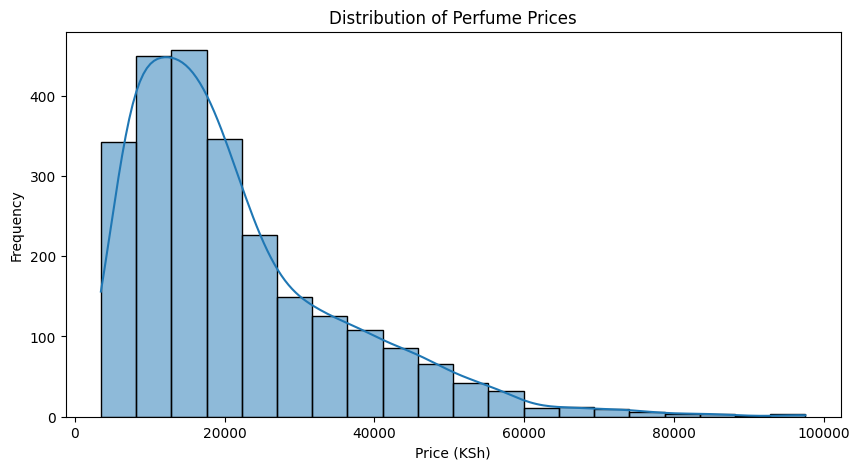

In [13]:
# 1. Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(cierra_data['price'], bins=20, kde=True)
plt.title("Distribution of Perfume Prices")
plt.xlabel("Price (KSh)")
plt.ylabel("Frequency")
plt.show()

In [34]:
#  Combine and clean all notes from 'top', 'middle', and 'base' columns
# - Fill missing values with empty strings
# - Convert to lowercase
# - Remove generic words like 'notes'

# Fill missing values, combine all notes, split by commas, and convert to lowercase
all_notes = pd.Series(cierra_data[['top', 'middle', 'base']].fillna('').values.ravel())
notes_split = all_notes.str.lower().str.split(',').explode().str.strip()  # Split and clean

# Remove common words like "notes"
# Filter out any instances of unwanted words
unwanted_words = {'notes', 'note',' top notes',''}  # Set of words to exclude
cleaned_notes = notes_split[~notes_split.isin(unwanted_words)]

# 2. Count frequency of each unique note after cleaning
note_counts = Counter(cleaned_notes)
most_common_notes = note_counts.most_common(20)  # Get top 20 most common notes

# 3. Display the results
print("Top 20 Most Common Scent Notes (after cleaning):")
for note, count in most_common_notes:
    print(f"{note}: {count}")

Top 20 Most Common Scent Notes (after cleaning):
musk: 125
patchouli: 112
vanilla: 105
jasmine: 104
bergamot: 100
amber: 98
sandalwood: 92
vetiver: 73
rose: 65
tonka bean: 51
notes:: 50
fragrance notes:: 48
cardamom: 48
cinnamon: 42
lemon: 41
pink pepper: 38
mandarin: 38
top notes: bergamot: 37
cedar: 37
grapefruit: 36


In [35]:
# 2. Scent Note Frequency
# Combine all scent notes into one series for analysis
all_notes = pd.Series(cierra_data[['top', 'middle', 'base']].fillna('').values.ravel())
notes_split = all_notes.str.split(',').dropna().explode().str.strip()  # Split and clean notes


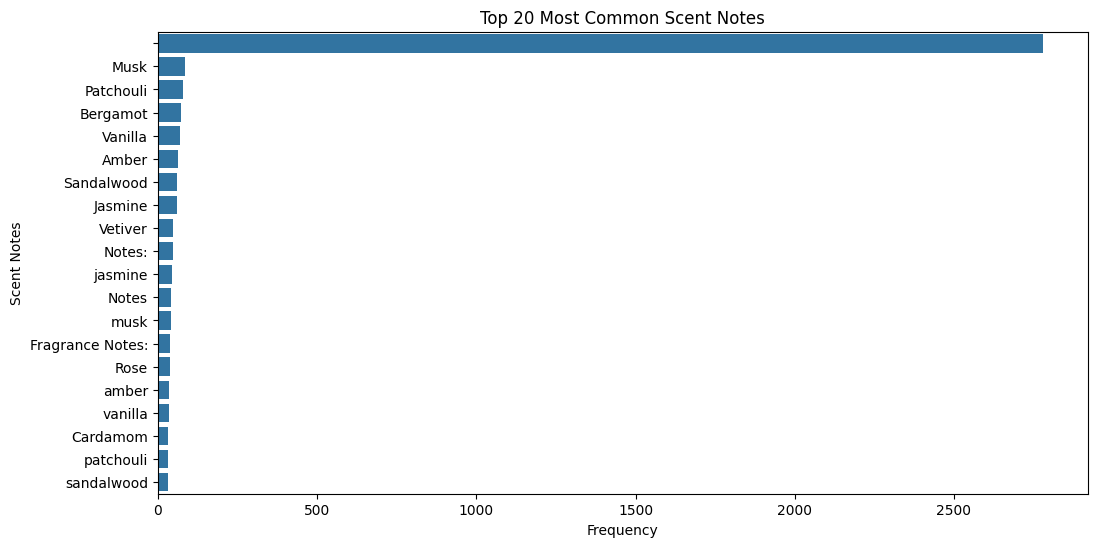

In [36]:

# Convert notes_split to a DataFrame
notes_split_df = pd.DataFrame(notes_split, columns=['note'])

# Count occurrences of each note
top_20_notes = notes_split_df['note'].value_counts().iloc[:20]

plt.figure(figsize=(12, 6))
sns.barplot(y=top_20_notes.index, x=top_20_notes.values)
plt.title("Top 20 Most Common Scent Notes")
plt.xlabel("Frequency")
plt.ylabel("Scent Notes")
plt.show()


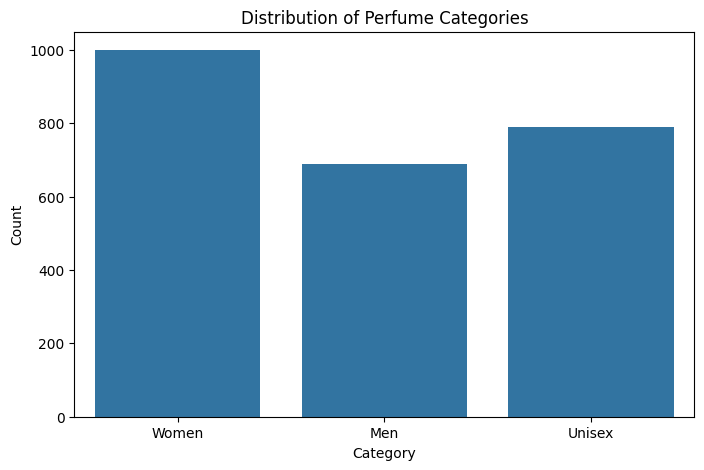

In [17]:
# 3. Category Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=cierra_data, x='category')
plt.title("Distribution of Perfume Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

### Preprocessing

In [18]:


# 1. Combine scent notes into a single column for each perfume
# Fill missing values with empty strings, split notes, and combine into a single scent profile
cierra_data['scent_profile'] = cierra_data[['top', 'middle', 'base']].fillna('').agg(', '.join, axis=1)

# 2. Price Normalization
scaler = MinMaxScaler()
cierra_data['price_normalized'] = scaler.fit_transform(cierra_data[['price']])

# Display the prepared data
print(cierra_data[['title', 'scent_profile', 'price_normalized']].head())


                                               title  \
0  Aberchrombie & Fitch, Authentic Away Edp 100Ml...   
1  Aberchrombie & Fitch, Authentic Night Edp 100Ml W   
2  Aberchrombie & Fitch, Authentic Night Edp 100M...   
3                             AFNAN, 9AM EDP 100ML W   
4                  AFNAN, VIOLET BOUQUET EDP 100ML W   

                                       scent_profile  price_normalized  
0  Top Notes: Brazilian Mandarin, Red Currant, Pe...          0.078723  
1  Fragrance Notes:, A mouth-watering combination...          0.041489  
2  3 Piece Set Includes:, – 100ml Eau De Parfum S...          0.059574  
3  Top Notes: Mandarin, Cedrat, Cardamom and Pink...          0.031915  
4  Top notes: Sweet, Woody, Saffron, Citrus., Mid...          0.040426  


###  Building the Recommendation System


 Vectorizing Scent Profiles
 
Combine Scent Notes: We’ll use the cleaned scent_profile column (which combines top, middle, and base notes) and turn it into a TF-IDF matrix. Each perfume’s scent profile will become a vector, allowing us to compare perfumes based on scent similarity.
Calculate Similarity Matrix: Using cosine similarity, we can calculate how similar each perfume is to others based on their scent profiles

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assuming cierra_data is preprocessed and has a combined 'scent_profile' column

# 1. Vectorize the 'scent_profile' using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(cierra_data['scent_profile'].fillna(''))  # Handle any missing scent profiles

# 2. Compute the cosine similarity matrix
scent_similarity = cosine_similarity(tfidf_matrix)

# Display the shape of the similarity matrix
print("Shape of Scent Similarity Matrix:", scent_similarity.shape)


Shape of Scent Similarity Matrix: (2479, 2479)


Next Step: Price-Based Filtering

In [47]:


def recommend_perfumes(user_scent, min_price, max_price, top_n=5):
    """
    Recommends perfumes based on user's scent preference and price range.
    
    Parameters:
        user_scent (str): The scent note(s) preferred by the user.
        min_price (float): Minimum price range for the recommendations.
        max_price (float): Maximum price range for the recommendations.
        top_n (int): Number of top recommendations to return.
    
    Returns:
        DataFrame: Top recommended perfumes based on scent and price range.
    """
    # 1. Vectorize the user's input scent using the same TF-IDF vectorizer
    user_tfidf = tfidf_vectorizer.transform([user_scent.lower()])  # Convert to lowercase for consistency
    
    # 2. Calculate cosine similarity between user scent and all perfumes
    user_similarity_scores = cosine_similarity(user_tfidf, tfidf_matrix).flatten()
    
    # 3. Filter perfumes within the specified price range
    price_filtered_indices = (cierra_data['price'] >= min_price) & (cierra_data['price'] <= max_price)
    price_filtered_data = cierra_data[price_filtered_indices]
    price_filtered_scores = user_similarity_scores[price_filtered_indices]
    
    # 4. Sort perfumes by similarity scores (descending) and get top N
    top_indices = np.argsort(price_filtered_scores)[-top_n:][::-1]  # Get indices of top N similar perfumes
    
    # 5. Retrieve the top recommendations
    recommendations = price_filtered_data.iloc[top_indices]
    
    # Return the recommendations with selected columns for display
    return recommendations[['title', 'scent_profile', 'price']]

# Example usage:
# User preferences: "vanilla, jasmine", minimum price of KSh 5000, maximum price of KSh 20000
recommended_perfumes = recommend_perfumes("vanilla, jasmine", min_price=5000, max_price=20000, top_n=5)
print("Top Recommended Perfumes:\n", recommended_perfumes)


Top Recommended Perfumes:
                                        title  \
413            Givenchy, Organza Edp 100Ml W   
717      Montale, Vanille Absolu Edp 100Ml W   
961  Viva La Juicy, Gold Couture Edp 100Ml W   
298      Dolce & Gabbana, The One Edp 75Ml W   
370   Giorgio Armani, Armani Code Edp 75Ml W   

                                         scent_profile    price  
413    Head: Jasmine.Heart: Gardenia.Base: Vanilla, ,   12000.0  
717       The must-have Vanilla of our collection., ,   12300.0  
961  Key Notes, Luscious Berry, Jasmine Sambac, Van...   9000.0  
298  Notes : Bergamot, Litchi, Peach, Lily Of The V...  12500.0  
370  Top notes: Jasmine, OrangeHeart notes: Orange ...  18400.0  


In [48]:
# Example usage:
# User preferences: "vanilla, jasmine", minimum price of KSh 5000, maximum price of KSh 20000
recommended_perfumes = recommend_perfumes("vanilla", min_price=1000, max_price=10000, top_n=5)
print("Top Recommended Perfumes:\n", recommended_perfumes)

Top Recommended Perfumes:
                                           title  \
1445              Joop, Homme Le Parfum 100Ml M   
961     Viva La Juicy, Gold Couture Edp 100Ml W   
1262                Dunhill, London Edt 100Ml M   
70          Britney Spears, Curious Edp 100Ml W   
1127  Calvin Klein, Obsession Night Edp 125Ml M   

                                          scent_profile   price  
1445  Top notes: Lavender, Heart notes: Iris, Base n...  7900.0  
961   Key Notes, Luscious Berry, Jasmine Sambac, Van...  9000.0  
1262  The fragrance features sandalwood, tonka bean,...  4700.0  
70    The composition is based on the notes of white...  5600.0  
1127  Top notes: Artemisia, Grapefruit, Pear and Car...  7200.0  


In [22]:

import csv
import re
import time
import nltk
import string
import pickle

import numpy as np
import pandas as pd
from itertools import chain
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import RegexpTokenizer

In [23]:

#tokenize
tokenizer = RegexpTokenizer(r'\w+')

In [24]:
def remove_punctuation(text):
    #tokenizer breaks string into a list of words
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join([c for c in text if c not in string.punctuation])
    return text

In [25]:
def make_lower_case(text):
    text = text.lower()
    return text

In [26]:
cierra_data.top=cierra_data.top

In [27]:
cierra_data.brand_names=cierra_data.top.apply(lambda x: remove_punctuation(x))
cierra_data.brand_names=cierra_data.top.apply(lambda x: make_lower_case(x))
cierra_data.brand_names=cierra_data.middle.apply(lambda x: remove_punctuation(x))
cierra_data.brand_names=cierra_data.middle.apply(lambda x: make_lower_case(x))
cierra_data.brand_names=cierra_data.base.apply(lambda x: remove_punctuation(x))
cierra_data.brand_names=cierra_data.base.apply(lambda x: make_lower_case(x))


#cierra_data.description=cierra_data['description'].apply(lambda x: remove_punctuation(x))
#cierra_data.description=cierra_data['description'].apply(lambda x: make_lower_case(x))

C:\Users\user\AppData\Local\Temp\ipykernel_19128\576061281.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cierra_data.brand_names=cierra_data.top.apply(lambda x: remove_punctuation(x))


In [31]:
import spacy
import pandas as pd

# Load the spaCy English model (ensure you have installed it with `python -m spacy download en_core_web_sm`)
nlp = spacy.load('en_core_web_sm')

# Sample perfume dataset (assuming 'scent_profile' column combines top, middle, base notes)
# For demonstration, cierra_data should already contain a 'scent_profile' column
cierra_data['scent_profile'] = cierra_data['scent_profile'].fillna('')  # Handle missing values

def lemmatize_scent_profile(text):
    """
    Tokenizes and lemmatizes a scent profile string.
    
    Parameters:
        text (str): The scent profile of a perfume as a single string.
        
    Returns:
        str: A lemmatized and cleaned scent profile.
    """
    doc = nlp(text.lower())  # Convert to lowercase for consistency
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(lemmatized_tokens)

# Apply the lemmatization function to the scent profiles
cierra_data['scent_profile_lemmatized'] = cierra_data['scent_profile'].apply(lemmatize_scent_profile)

# Display the original and lemmatized scent profiles for comparison
print(cierra_data[['scent_profile', 'scent_profile_lemmatized']].head())


                                       scent_profile  \
0  Top Notes: Brazilian Mandarin, Red Currant, Pe...   
1  Fragrance Notes:, A mouth-watering combination...   
2  3 Piece Set Includes:, – 100ml Eau De Parfum S...   
3  Top Notes: Mandarin, Cedrat, Cardamom and Pink...   
4  Top notes: Sweet, Woody, Saffron, Citrus., Mid...   

                            scent_profile_lemmatized  
0  note brazilian mandarin red currant pear heart...  
1  fragrance note mouth water combination black c...  
2  3 piece set include 100ml eau de parfum spray ...  
3  note mandarin cedrat cardamom pink pepper midd...  
4  note sweet woody saffron citrus middle note ar...  


In [44]:
import numpy as np

# Assuming the TF-IDF matrix and cosine similarity matrix are ready
# And that `cierra_data` contains the `price` and `scent_profile_lemmatized` columns

def recommend_perfumes(scent_input, price_min, price_max, top_n=5):
    """
    Recommend perfumes based on user scent preference and price range.

    Parameters:
    - scent_input (str): User's preferred scent description.
    - price_min (float): Minimum price in the desired range.
    - price_max (float): Maximum price in the desired range.
    - top_n (int): Number of top recommendations to return.

    Returns:
    - recommendations (pd.DataFrame): DataFrame of top perfume recommendations.
    """
    # Step 1: Transform the user's scent input using the TF-IDF vectorizer
    user_scent_vector = tfidf_vectorizer.transform([scent_input])

    # Step 2: Calculate the cosine similarity between user's scent vector and all perfumes
    user_similarity_scores = cosine_similarity(user_scent_vector, tfidf_matrix).flatten()

    # Step 3: Apply a mask to filter perfumes within the specified price range
    price_filtered_indices = (cierra_data['price'] >= price_min) & (cierra_data['price'] <= price_max)
    filtered_scores = user_similarity_scores[price_filtered_indices]

    # Step 4: Get the indices of top N perfumes based on similarity scores within price range
    top_indices = np.argsort(filtered_scores)[-top_n:][::-1]
    top_perfumes_indices = np.where(price_filtered_indices)[0][top_indices]

    # Step 5: Retrieve the recommended perfumes
    recommendations = cierra_data.iloc[top_perfumes_indices]
    recommendations = recommendations[['title', 'price', 'scent_profile', 'scent_profile_lemmatized']]

    return recommendations

# Example usage:
scent_input = "vanilla "  # User's preferred scent
price_min = 1000                 # Minimum price
price_max = 10000               # Maximum price
recommendations = recommend_perfumes(scent_input, price_min, price_max, top_n=5)
print(recommendations)


                                          title   price  \
1445              Joop, Homme Le Parfum 100Ml M  7900.0   
961     Viva La Juicy, Gold Couture Edp 100Ml W  9000.0   
1262                Dunhill, London Edt 100Ml M  4700.0   
70          Britney Spears, Curious Edp 100Ml W  5600.0   
1127  Calvin Klein, Obsession Night Edp 125Ml M  7200.0   

                                          scent_profile  \
1445  Top notes: Lavender, Heart notes: Iris, Base n...   
961   Key Notes, Luscious Berry, Jasmine Sambac, Van...   
1262  The fragrance features sandalwood, tonka bean,...   
70    The composition is based on the notes of white...   
1127  Top notes: Artemisia, Grapefruit, Pear and Car...   

                               scent_profile_lemmatized  
1445  note lavender heart note iris base note vanill...  
961   key note luscious berry jasmine sambac vanilla...  
1262  fragrance feature sandalwood tonka bean patcho...  
70    composition base note white flower surround va...  


In [50]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


          Note  Count
0         note   3041
17   fragrance    994
6        heart    795
12        base    736
102    vanilla    555
16        musk    543
11     jasmine    487
206   bergamot    465
85        rise    433
52          de    428


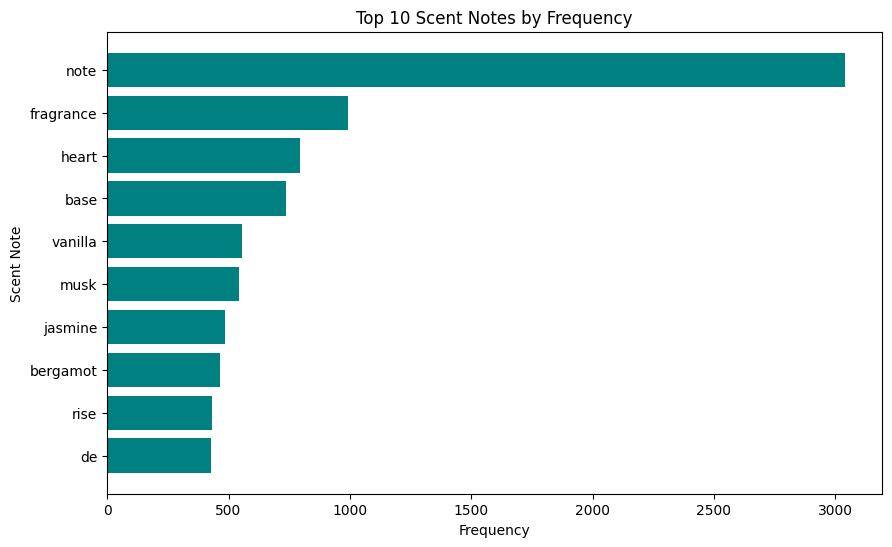

In [63]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Split the scent profile text and count word frequencies
all_notes = ' '.join(cierra_data['scent_profile_lemmatized'].fillna('')).split()
note_counts = Counter(all_notes)

# Convert to DataFrame for easier sorting and visualization
note_counts_df = pd.DataFrame(note_counts.items(), columns=['Note', 'Count'])
note_counts_df = note_counts_df.sort_values(by='Count', ascending=False)

# Display the top 10 notes
print(note_counts_df.head(10))

# Step 2: Plot a bar chart of the top 10 words to verify their frequencies
plt.figure(figsize=(10, 6))
plt.barh(note_counts_df['Note'].head(10), note_counts_df['Count'].head(10), color='teal')
plt.xlabel('Frequency')
plt.ylabel('Scent Note')
plt.title('Top 10 Scent Notes by Frequency')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.show()


          Note  Count
0         note   3041
17   fragrance    994
6        heart    795
12        base    736
102    vanilla    555
16        musk    543
11     jasmine    487
206   bergamot    465
85        rise    433
52          de    428


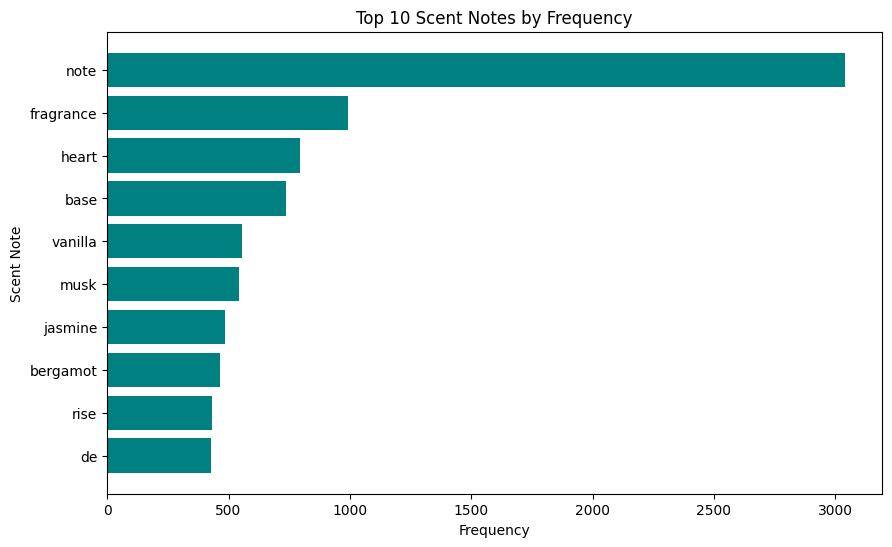

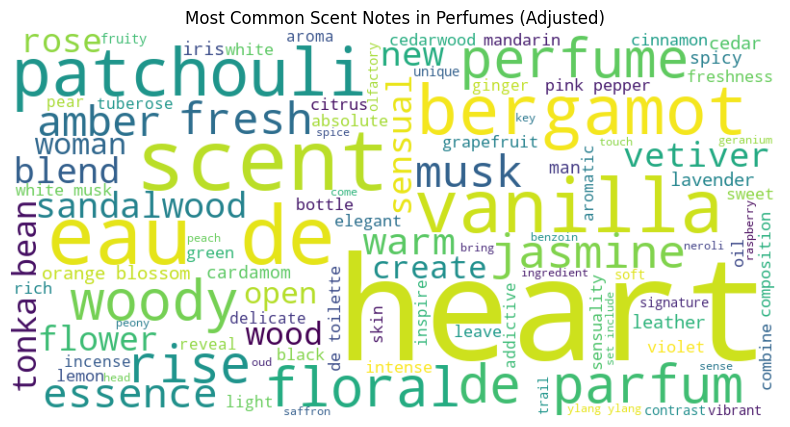

In [68]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Step 1: Split the scent profile text and count word frequencies
all_notes = ' '.join(cierra_data['scent_profile_lemmatized'].fillna('')).split()
note_counts = Counter(all_notes)

# Convert to DataFrame for easier sorting and visualization
note_counts_df = pd.DataFrame(note_counts.items(), columns=['Note', 'Count'])
note_counts_df = note_counts_df.sort_values(by='Count', ascending=False)

# Display the top 10 notes
print(note_counts_df.head(10))

# Step 2: Plot a bar chart of the top 10 words to verify their frequencies
plt.figure(figsize=(10, 6))
plt.barh(note_counts_df['Note'].head(10), note_counts_df['Count'].head(10), color='teal')
plt.xlabel('Frequency')
plt.ylabel('Scent Note')
plt.title('Top 10 Scent Notes by Frequency')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.show()

# Join all scent notes into a single string
all_scent_notes = ' '.join(all_notes)

# Define additional stopwords to remove from the word cloud
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['note', 'notes', 'accord', 'fragrance', 'base', 'top', 'middle'])  # Add custom words here

# Generate the word cloud with adjusted scaling
wordcloud = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    stopwords=custom_stopwords,
    colormap='viridis',
    max_words=100,
    max_font_size=150,       # Increase max font size
    relative_scaling=1       # Make frequency more impactful on size
).generate(all_scent_notes)

# Plot the adjusted word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Scent Notes in Perfumes (Adjusted)")
plt.show()


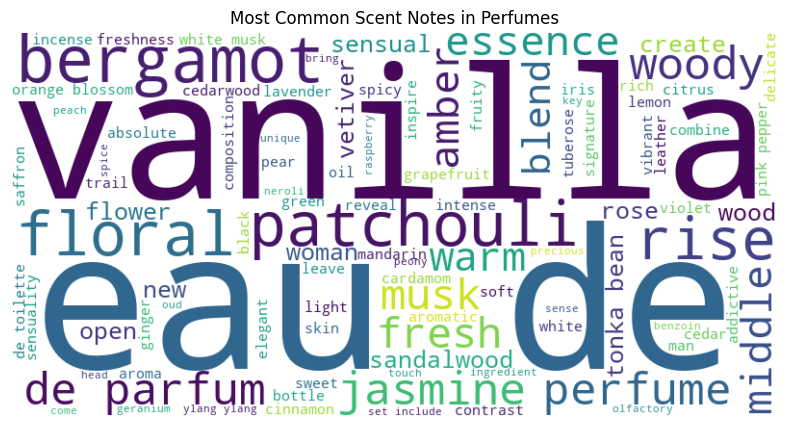

In [53]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all scent profiles into a single string
all_scent_notes = ' '.join(cierra_data['scent_profile_lemmatized'].fillna(''))

# Define additional stopwords, including 'fragrance'
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['note', 'notes', 'accord', 'fragrance','scent','heart','base'])  # Add any other words to ignore

# Generate the word cloud
wordcloud = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    stopwords=custom_stopwords,
    colormap='viridis',  # You can choose different colormaps here
    max_words=100        # Limit to top 100 words
).generate(all_scent_notes)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title("Most Common Scent Notes in Perfumes")
plt.show()


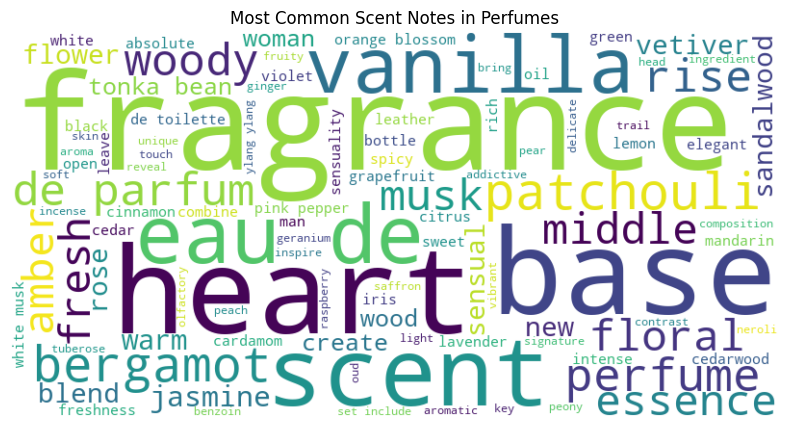

In [51]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all scent profiles into a single string
all_scent_notes = ' '.join(cierra_data['scent_profile_lemmatized'].fillna(''))

# Define additional stopwords, if needed
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['note', 'notes', 'accord'])  # Add any other words you want to ignore

# Generate the word cloud
wordcloud = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    stopwords=custom_stopwords,
    colormap='viridis',  # You can choose different colormaps here (e.g., 'plasma', 'cool', 'inferno')
    max_words=100        # Limit to top 100 words
).generate(all_scent_notes)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title("Most Common Scent Notes in Perfumes")
plt.show()
